In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the data
file_path = './research_paper_dataset.csv'  # Adjust the file path if needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,abstract,authors,n_citation,references,title,venue,year,id
0,"In this paper, a robust 3D triangular mesh wat...","['S. Ben Jabra', 'Ezzeddine Zagrouba']",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",A new approach of 3D watermarking based on ima...,international symposium on computers and commu...,2008,4ab3735c-80f1-472d-b953-fa0557fed28b
1,We studied an autoassociative neural network w...,"['Joaquín J. Torres', 'Jesús M. Cortés', 'Joaq...",50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Attractor neural networks with activity-depend...,Neurocomputing,2007,4ab39729-af77-46f7-a662-16984fb9c1db
2,It is well-known that Sturmian sequences are t...,"['Genevi eve Paquin', 'Laurent Vuillon']",50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",A characterization of balanced episturmian seq...,Electronic Journal of Combinatorics,2007,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de
3,One of the fundamental challenges of recognizi...,"['Yaser Sheikh', 'Mumtaz Sheikh', 'Mubarak Shah']",221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",Exploring the space of a human action,international conference on computer vision,2005,4ab3a98c-3620-47ec-b578-884ecf4a6206
4,This paper generalizes previous optimal upper ...,"['Efraim Laksman', 'Håkan Lennerstad', 'Magnus...",0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Generalized upper bounds on the minimum distan...,Ima Journal of Mathematical Control and Inform...,2015,4ab3b585-82b4-4207-91dd-b6bce7e27c4e


In [2]:
data.head(5)

,abstract,authors,n_citation,references,title,venue,year,id
0,"In this paper, a robust 3D triangular mesh wat...","['S. Ben Jabra', 'Ezzeddine Zagrouba']",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",A new approach of 3D watermarking based on ima...,international symposium on computers and commu...,2008,4ab3735c-80f1-472d-b953-fa0557fed28b
1,We studied an autoassociative neural network w...,"['Joaquín J. Torres', 'Jesús M. Cortés', 'Joaq...",50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Attractor neural networks with activity-depend...,Neurocomputing,2007,4ab39729-af77-46f7-a662-16984fb9c1db
2,It is well-known that Sturmian sequences are t...,"['Genevi eve Paquin', 'Laurent Vuillon']",50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",A characterization of balanced episturmian seq...,Electronic Journal of Combinatorics,2007,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de
3,One of the fundamental challenges of recognizi...,"['Yaser Sheikh', 'Mumtaz Sheikh', 'Mubarak Shah']",221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",Exploring the space of a human action,international conference on computer vision,2005,4ab3a98c-3620-47ec-b578-884ecf4a6206
4,This paper generalizes previous optimal upper ...,"['Efraim Laksman', 'Håkan Lennerstad', 'Magnus...",0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Generalized upper bounds on the minimum distan...,Ima Journal of Mathematical Control and Inform...,2015,4ab3b585-82b4-4207-91dd-b6bce7e27c4e


In [3]:
data.isnull().sum()

abstract      172467
authors            2
n_citation         0
references    124417
title              0
venue         177755
year               0
id                 0
dtype: int64

In [5]:
data['n_citation'].dtype

dtype('int64')

In [6]:
df1 = data.dropna(subset=['abstract'])

In [7]:
df1.head(20)

,abstract,authors,n_citation,references,title,venue,year,id
0,"In this paper, a robust 3D triangular mesh wat...","['S. Ben Jabra', 'Ezzeddine Zagrouba']",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",A new approach of 3D watermarking based on ima...,international symposium on computers and commu...,2008,4ab3735c-80f1-472d-b953-fa0557fed28b
1,We studied an autoassociative neural network w...,"['Joaquín J. Torres', 'Jesús M. Cortés', 'Joaq...",50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Attractor neural networks with activity-depend...,Neurocomputing,2007,4ab39729-af77-46f7-a662-16984fb9c1db
2,It is well-known that Sturmian sequences are t...,"['Genevi eve Paquin', 'Laurent Vuillon']",50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",A characterization of balanced episturmian seq...,Electronic Journal of Combinatorics,2007,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de
3,One of the fundamental challenges of recognizi...,"['Yaser Sheikh', 'Mumtaz Sheikh', 'Mubarak Shah']",221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",Exploring the space of a human action,international conference on computer vision,2005,4ab3a98c-3620-47ec-b578-884ecf4a6206
4,This paper generalizes previous optimal upper ...,"['Efraim Laksman', 'Håkan Lennerstad', 'Magnus...",0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Generalized upper bounds on the minimum distan...,Ima Journal of Mathematical Control and Inform...,2015,4ab3b585-82b4-4207-91dd-b6bce7e27c4e
5,Queueing networks with multiple classes of cus...,"['Simonetta Balsamo', 'Gian–Luca Dei Rossi', '...",6,"['1c26e228-57d2-4b2c-b0c9-8d5851c17fac', '7539...",Applying BCMP multi-class queueing networks fo...,International Journal of Computer Aided Engine...,2015,4ab3e768-78c9-4497-8b8e-9e934cb5f2e4
6,A CMOS oscillator employing differential trans...,"['Andrea Mazzanti', 'Pietro Andreani']",50,"['0a09db01-264a-4bdf-942c-d33cceb35d3c', '36c9...",A Push–Pull Class-C CMOS VCO,IEEE Journal of Solid-state Circuits,2013,4ab3f7cd-140b-4e29-99d4-f4e8006c4f65
7,In statistical setting of the pattern recognit...,['Daniil Ryabko'],2,['505f493b-e09d-444d-9ee2-5e5db6a5b8ac'],On computability of pattern recognition problems,algorithmic learning theory,2005,4ab404e2-6f4b-4fb4-b093-50775e765b13
8,We first discuss some general aspects of micro...,"['Maria Chiara Carrozza', 'Paolo Dario', 'Aria...",50,"['5ecd70e1-7ccc-4b2f-ac09-b91953cca5cd', '7fa7...",Manipulating biological and mechanical micro-o...,international conference on robotics and autom...,1998,4ab4244d-fb3e-49a3-b125-367df3d8e6ba
10,"In 1999, Iwan Duursma defined the zeta functio...",['Koji Chinen'],0,"['02d38c7d-3baf-40e3-86d7-a8884ff503f4', '078e...",An abundance of invariant polynomials satisfyi...,Discrete Mathematics,2008,4ab459ce-5f18-4cc0-9627-1dc557eb8b68


In [8]:
df1['abstract'] = df1['abstract'].fillna('')
df1['title'] = df1['title'].fillna('')

# Combine title and abstract for text processing
df1['text'] = df1['title'].astype(str) + ' ' + df1['abstract'].astype(str)

# Tokenize the text data
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(df1['text'])
sequences = tokenizer.texts_to_sequences(df1['text'])

# Pad the sequences
maxlen = 300  # Maximum length of sequences
X = pad_sequences(sequences, maxlen=maxlen)

# Prepare the target variable
y = df1['n_citation'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\Dell\AppData\Local\Temp\ipykernel_18128\4234072650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['abstract'] = df1['abstract'].fillna('')
C:\Users\Dell\AppData\Local\Temp\ipykernel_18128\4234072650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['title'] = df1['title'].fillna('')
C:\Users\Dell\AppData\Local\Temp\ipykernel_18128\4234072650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [9]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_shape=(maxlen,)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/5
 477/4138 [==>...........................] - ETA: 4:03:55 - loss: 83322.3203

ResourceExhaustedError: Graph execution error:

Detected at node sequential/dropout/dropout/GreaterEqual defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\Dell\AppData\Local\Temp\ipykernel_18128\3332425783.py", line 14, in <module>

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\regularization\dropout.py", line 120, in call

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\control_flow_util.py", line 108, in smart_cond

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\regularization\dropout.py", line 116, in dropped_inputs

  File "c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 2172, in dropout

OOM when allocating tensor with shape[128,300,128] and type bool on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node sequential/dropout/dropout/GreaterEqual}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_11492]

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 522s 84ms/step
Mean Absolute Error: 36.5341725893414
Root Mean Squared Error: 186.62826772904592


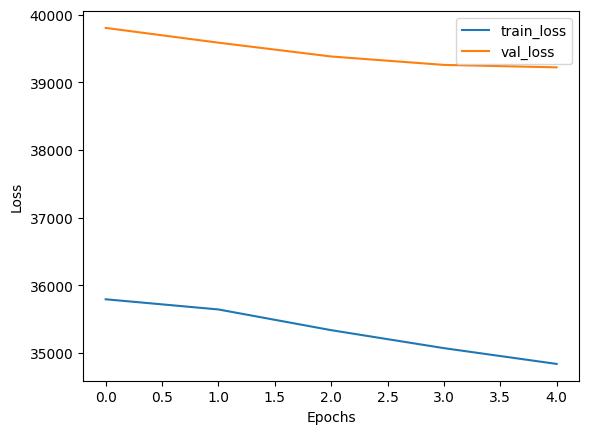

In [7]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# Plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.018681049346923828


In [15]:
# Test on a new abstract
import os
import pickle
test_abstract = "This paper introduces a novel approach to quantum computing..."
test_title = "Quantum Computing Advancements"
test_text = test_title + ' ' + test_abstract

# Preprocess the test abstract
test_sequence = tokenizer.texts_to_sequences([test_text])
test_padded = pad_sequences(test_sequence, maxlen=maxlen)

# Predict the citation count for the new abstract
predicted_citation = model.predict(test_padded)
print(f"Predicted Citation Count: {predicted_citation[0][0]}")

# Save the model and tokenizer to files
model_save_path = './citation_model.keras'
tokenizer_save_path = './tokenizer.pkl'

# Delete the existing model file if it exists
if os.path.exists(model_save_path):
    os.remove(model_save_path)

# Save the Keras model in the new format
model.save(model_save_path)

# Save the tokenizer
with open(tokenizer_save_path, 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Citation Count: 15.985666275024414


In [1]:
# # Test on a new abstract
# import os
# test_abstract = "This paper introduces a novel approach to quantum computing..."
# test_title = "Quantum Computing Advancements"
# test_text = test_title + ' ' + test_abstract

# # Preprocess the test abstract
# test_sequence = tokenizer.texts_to_sequences([test_text])
# test_padded = pad_sequences(test_sequence, maxlen=maxlen)

# # Predict the citation count for the new abstract
# predicted_citation = model.predict(test_padded)
# print(f"Predicted Citation Count: {predicted_citation[0][0]}")

# # Save the model and tokenizer to files
# model_save_path = './citation_model.h5'
# tokenizer_save_path = './tokenizer.pkl'

# # Delete the existing model file if it exists
# if os.path.exists(model_save_path):
#     os.remove(model_save_path)

# # Save the Keras model
# model.save(model_save_path)

# # Save the tokenizer
# with open(tokenizer_save_path, 'wb') as tokenizer_file:
#     pickle.dump(tokenizer, tokenizer_file)